In [385]:
#download the packages to use
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [386]:
#load the trainings and test data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [387]:
train.shape


(6895, 70)

In [388]:
# Identify features with missing values
features_with_missing_values = train.columns[train.isnull().any()].tolist()

# Display the count of missing values for each feature
missing_values_count = train[features_with_missing_values].isnull().sum()

# Print the results
print("Features with missing values:")
print(features_with_missing_values)

print("\nCount of missing values for each feature:")
print(missing_values_count)

Features with missing values:
['value_eur', 'club_loaned_from', 'club_joined', 'nation_jersey_number', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'goalkeeping_speed']

Count of missing values for each feature:
value_eur                  2
club_loaned_from        6544
club_joined              351
nation_jersey_number    6482
release_clause_eur       353
player_tags             6124
player_traits           2589
pace                     631
shooting                 631
passing                  631
dribbling                631
defending                631
physic                   631
goalkeeping_speed       6264
dtype: int64


In [389]:
test.shape

(767, 69)

In [390]:
# Identify features with missing values
features_with_missing_values = test.columns[test.isnull().any()].tolist()

# Display the count of missing values for each feature
missing_values_count = test[features_with_missing_values].isnull().sum()

# Print the results
print("Features with missing values:")
print(features_with_missing_values)

print("\nCount of missing values for each feature:")
print(missing_values_count)

Features with missing values:
['value_eur', 'club_loaned_from', 'club_joined', 'nation_jersey_number', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'goalkeeping_speed']

Count of missing values for each feature:
value_eur                 3
club_loaned_from        722
club_joined              45
nation_jersey_number    716
release_clause_eur       48
player_tags             682
player_traits           285
pace                     70
shooting                 70
passing                  70
dribbling                70
defending                70
physic                   70
goalkeeping_speed       697
dtype: int64


In [391]:
#create a new column called test_train to identify after which data belongs to test and train data
test['test_train']=0
train['test_train']=1


In [392]:
# concat train data with test data to have more observations, clean it all together and improve accuracy
all_data = pd.concat([train,test]).reset_index()

In [393]:
pd.set_option('display.max_columns', None)

# 1.Data Preprocessing and Quality Assurance: 

In [394]:
all_data.head()

,index,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,club_name,league_name,league_level,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_name,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position,test_train
0,0,216302,E. García,71,71,1400000.0,10000,1989-12-28,176,73,Club Atlético de San Luis,Mexican Liga MX,1,29,NaN,2021-07-12,2026,Mexico,NaN,Right,5,3,1,Medium/High,Normal (170-185),No,2400000.0,NaN,Early Crosser,70.0,52.0,60.0,70.0,67.0,66.0,64,40,56,65,41,68,64,58,58,68,71,70,87,61,86,67,77,86,58,66,56,79,53,48,58,66,65,66,65,14,11,12,12,12,NaN,LB,1
1,1,237867,D. Cancola,65,71,1000000.0,2000,1996-10-23,183,73,Ross County FC,Scottish Premiership,1,4,NaN,2021-07-23,2022,Austria,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,2000000.0,NaN,NaN,65.0,38.0,58.0,60.0,63.0,67.0,50,31,59,64,31,57,36,41,64,65,64,65,57,62,67,49,62,71,66,42,66,66,48,62,46,59,65,61,58,10,13,7,6,11,NaN,LDM,1
2,2,253472,E. Kahl,65,77,1600000.0,2000,2001-09-27,178,69,Aarhus GF,Danish Superliga,1,19,NaN,2021-07-24,2026,Sweden,NaN,Left,3,3,1,High/Medium,Normal (170-185),No,2300000.0,NaN,Speed Dribbler (AI),79.0,35.0,58.0,66.0,59.0,64.0,59,30,53,60,37,65,56,35,55,64,82,77,71,62,75,50,65,67,61,28,69,62,58,60,31,65,60,58,59,10,10,8,10,11,NaN,LWB,1
3,3,223994,S. Mugoša,72,72,2300000.0,5000,1992-02-26,188,81,Incheon United FC,Korean K League 1,1,9,NaN,2018-02-08,2023,Montenegro,NaN,Right,3,3,1,High/Medium,Lean (185+),No,2900000.0,NaN,Finesse Shot,64.0,74.0,51.0,68.0,24.0,76.0,32,78,75,59,70,65,48,53,45,74,61,66,64,67,53,71,71,75,87,69,52,18,76,60,75,75,16,22,19,16,15,13,8,9,NaN,LS,1
4,4,251635,A. Țigănașu,65,65,525000.0,3000,1990-06-12,179,74,FC Botoşani,Romanian Liga I,1,30,NaN,2019-07-01,2022,Romania,NaN,Left,2,2,1,Medium/High,Normal (170-185),No,709000.0,NaN,Solid Player,74.0,53.0,59.0,53.0,61.0,69.0,64,38,49,63,46,43,53,58,55,56,71,76,70,60,71,72,80,78,70,67,53,63,60,52,52,58,64,61,58,12,5,11,12,15,NaN,LB,1


In [395]:
all_data.shape

(7662, 72)

In [396]:
all_data.isna().sum()

index                         0
id                            0
short_name                    0
overall                       0
potential                     0
                           ... 
goalkeeping_positioning       0
goalkeeping_reflexes          0
goalkeeping_speed          6961
position                    767
test_train                    0
Length: 72, dtype: int64

In [397]:
# Identify features with missing values
features_with_missing_values = all_data.columns[all_data.isnull().any()].tolist()

# Display the count of missing values for each feature
missing_values_count = all_data[features_with_missing_values].isnull().sum()

# Print the results
print("Features with missing values:")
print(features_with_missing_values)

print("\nCount of missing values for each feature:")
print(missing_values_count)

Features with missing values:
['value_eur', 'club_loaned_from', 'club_joined', 'nation_jersey_number', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'goalkeeping_speed', 'position']

Count of missing values for each feature:
value_eur                  5
club_loaned_from        7266
club_joined              396
nation_jersey_number    7198
release_clause_eur       401
player_tags             6806
player_traits           2874
pace                     701
shooting                 701
passing                  701
dribbling                701
defending                701
physic                   701
goalkeeping_speed       6961
position                 767
dtype: int64


In [398]:
#Also drop the ones I don't think apport any value
columns1 = ['short_name', 'club_name', 'league_name', 'nationality_name']
all_data = all_data.drop(columns1, axis=1)

In [399]:
# Identify features with missing values
features_with_missing_values = all_data.columns[all_data.isnull().any()].tolist()

# Display the count of missing values for each feature
missing_values_count = all_data[features_with_missing_values].isnull().sum()

# Print the results
print("Features with missing values:")
print(features_with_missing_values)

print("\nCount of missing values for each feature:")
print(missing_values_count)

Features with missing values:
['value_eur', 'club_loaned_from', 'club_joined', 'nation_jersey_number', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'goalkeeping_speed', 'position']

Count of missing values for each feature:
value_eur                  5
club_loaned_from        7266
club_joined              396
nation_jersey_number    7198
release_clause_eur       401
player_tags             6806
player_traits           2874
pace                     701
shooting                 701
passing                  701
dribbling                701
defending                701
physic                   701
goalkeeping_speed       6961
position                 767
dtype: int64


In [400]:
all_data.shape

(7662, 68)

In [401]:
all_data[features_with_missing_values].head()


,value_eur,club_loaned_from,club_joined,nation_jersey_number,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,goalkeeping_speed,position
0,1400000.0,NaN,2021-07-12,NaN,2400000.0,NaN,Early Crosser,70.0,52.0,60.0,70.0,67.0,66.0,NaN,LB
1,1000000.0,NaN,2021-07-23,NaN,2000000.0,NaN,NaN,65.0,38.0,58.0,60.0,63.0,67.0,NaN,LDM
2,1600000.0,NaN,2021-07-24,NaN,2300000.0,NaN,Speed Dribbler (AI),79.0,35.0,58.0,66.0,59.0,64.0,NaN,LWB
3,2300000.0,NaN,2018-02-08,NaN,2900000.0,NaN,Finesse Shot,64.0,74.0,51.0,68.0,24.0,76.0,NaN,LS
4,525000.0,NaN,2019-07-01,NaN,709000.0,NaN,Solid Player,74.0,53.0,59.0,53.0,61.0,69.0,NaN,LB


In [402]:
all_data.describe()

,index,id,overall,potential,value_eur,wage_eur,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,test_train
count,7662.000000,7662.000000,7662.000000,7662.000000,7.657000e+03,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,464.000000,7662.000000,7662.000000,7662.000000,7.261000e+03,6961.000000,6961.000000,6961.000000,6961.000000,6961.000000,6961.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,701.000000,7662.000000
mean,3140.280084,223616.285435,68.842600,72.048029,4.331453e+06,12030.253198,181.484338,75.552467,1.361655,16.525320,2022.763508,12.056034,2.996346,2.451188,1.147481,8.187938e+06,68.568596,54.301250,60.085045,64.577791,55.609395,68.346215,52.883973,48.222527,55.069956,62.348865,44.775516,58.376273,50.381754,45.283738,56.815583,61.784652,65.905116,66.038110,65.287001,65.020752,64.850692,60.519838,67.255416,67.909554,68.229313,49.838684,59.815714,51.504960,53.130645,56.939441,49.895589,61.901592,51.349517,52.304098,49.800052,15.903289,15.672409,15.545680,15.813234,16.011877,40.375178,0.899896
std,2101.513688,26710.529813,5.951663,6.074939,1.045019e+07,24385.866372,6.860952,7.042419,0.761018,15.487419,1.207030,6.902991,0.685301,0.780693,0.470143,2.044656e+07,11.708722,14.354508,9.574193,9.348321,15.624753,8.509289,17.850296,19.569581,16.905886,13.281468,17.879807,17.897941,18.364759,17.835926,14.149990,15.398347,14.501858,14.401695,14.472439,7.930761,14.235664,13.076355,12.171742,15.096912,11.786433,19.300841,16.272640,20.123523,19.313219,13.559154,15.668827,10.886174,19.658360,20.918691,20.638862,17.466642,16.767293,16.319634,17.191808,17.877237,10.194699,0.300159
min,0.000000,41.000000,48.000000,53.000000,2.500000e+04,500.000000,156.000000,53.000000,1.000000,1.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,3.900000e+04,28.000000,18.000000,25.000000,29.000000,16.000000,31.000000,7.000000,2.000000,5.000000,7.000000,4.000000,4.000000,7.000000,6.000000,9.000000,10.000000,15.000000,15.000000,19.000000,32.000000,19.000000,20.000000,27.000000,14.000000,25.000000,4.000000,11.000000,6.000000,2.000000,10.000000,8.000000,12.000000,4.000000,5.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000,0.000000
25%,1148.250000,207642.250000,65.000000,68.000000,7.250000e+05,2000.000000,177.000000,70.000000,1.000000,6.000000,2022.000000,6.000000,3.000000,2.000000,1.000000,1.100000e+06,62.000000,43.000000,54.000000,59.000000,43.000000,63.000000,42.000000,33.000000,48.000000,58.000000,31.000000,53.000000,37.000000,32.000000,50.000000,58.000000,58.000000,59.000000,57.000000,60.000000,56.000000,51.000000,60.000000,63.000000,61.000000,35.000000,51.000000,33.000000,42.000000,48.000000,40.000000,56.000000,35.000000,34.000000,31.000000,8.000000,8.000000,8.000000,8.000000,8.000000,33.000000,1.000000

In [403]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        7662 non-null   int64  
 1   id                           7662 non-null   int64  
 2   overall                      7662 non-null   int64  
 3   potential                    7662 non-null   int64  
 4   value_eur                    7657 non-null   float64
 5   wage_eur                     7662 non-null   int64  
 6   birthday_date                7662 non-null   object 
 7   height_cm                    7662 non-null   int64  
 8   weight_kg                    7662 non-null   int64  
 9   league_level                 7662 non-null   int64  
 10  club_jersey_number           7662 non-null   int64  
 11  club_loaned_from             396 non-null    object 
 12  club_joined                  7266 non-null   object 
 13  club_contract_vali

2. Exploratory Data Analysis (EDA)

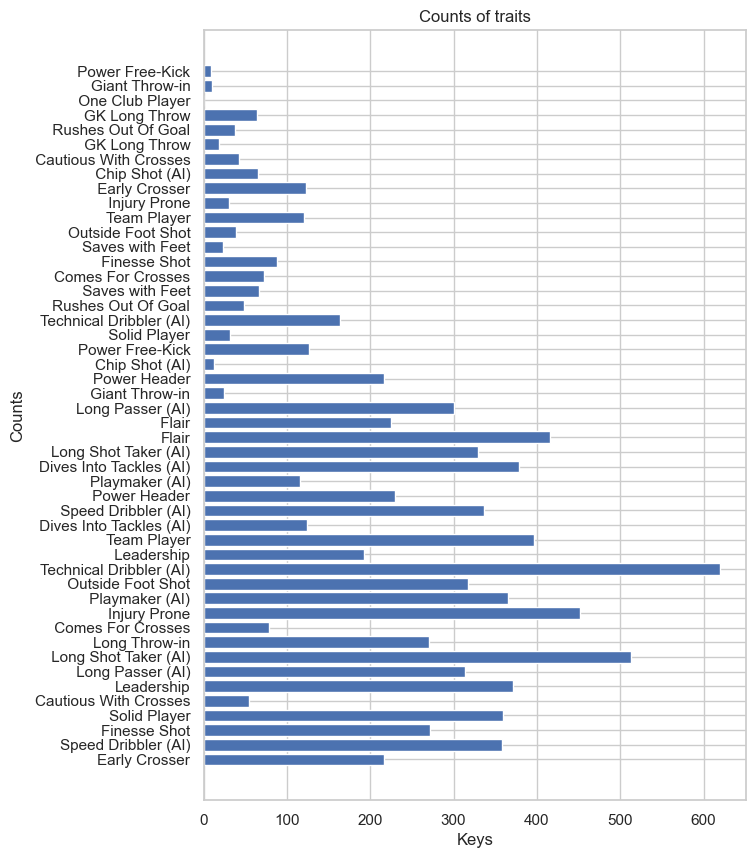

In [ ]:
# Plot chart with traits
keys, counts = zip(*trait_counts.items())

fig, ax = plt.subplots(figsize=(7, 10))
ax.barh(keys, counts)
ax.set_xlabel('Keys')
ax.set_ylabel('Counts')
ax.set_title('Counts of traits')
plt.show()

C:\Users\monbi\AppData\Local\Temp\ipykernel_12116\820431600.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  position_distribution = sns.countplot(x='position', data=all_data, order=all_data['position'].value_counts().index, palette='viridis')
C:\Users\monbi\AppData\Local\Temp\ipykernel_12116\820431600.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  position_distribution.set_xticklabels(position_distribution.get_xticklabels(), rotation=45, horizontalalignment='right')


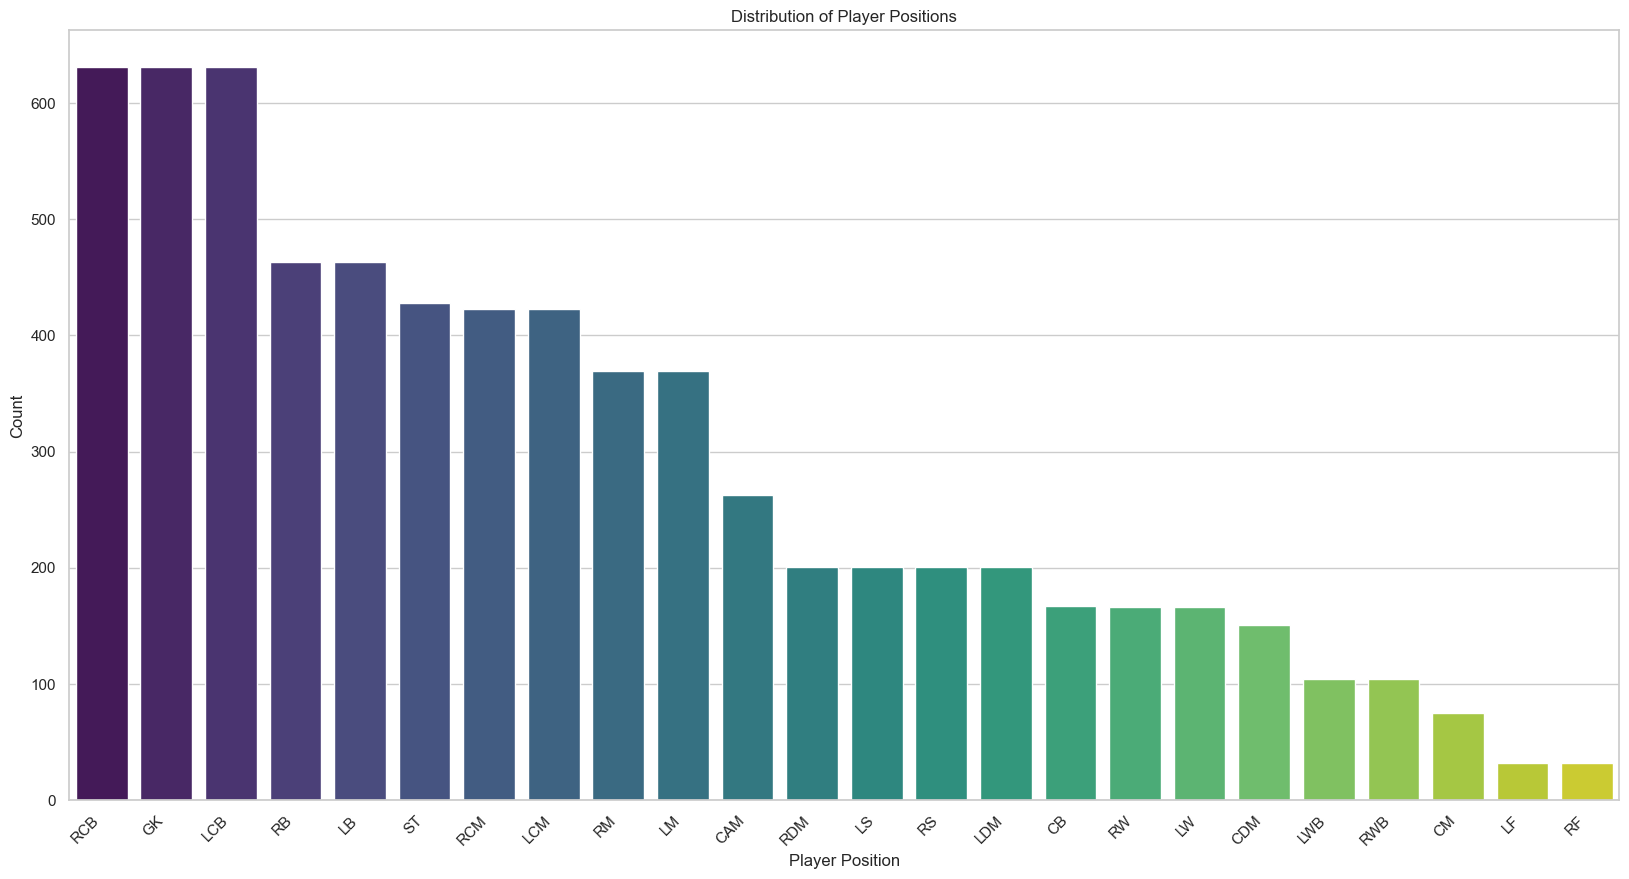

In [404]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))

# Plot the distribution of player positions
position_distribution = sns.countplot(x='position', data=all_data, order=all_data['position'].value_counts().index, palette='viridis') 

position_distribution.set(xlabel='Player Position', ylabel='Count', title='Distribution of Player Positions')

# Rotate x-axis labels for better visibility
position_distribution.set_xticklabels(position_distribution.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

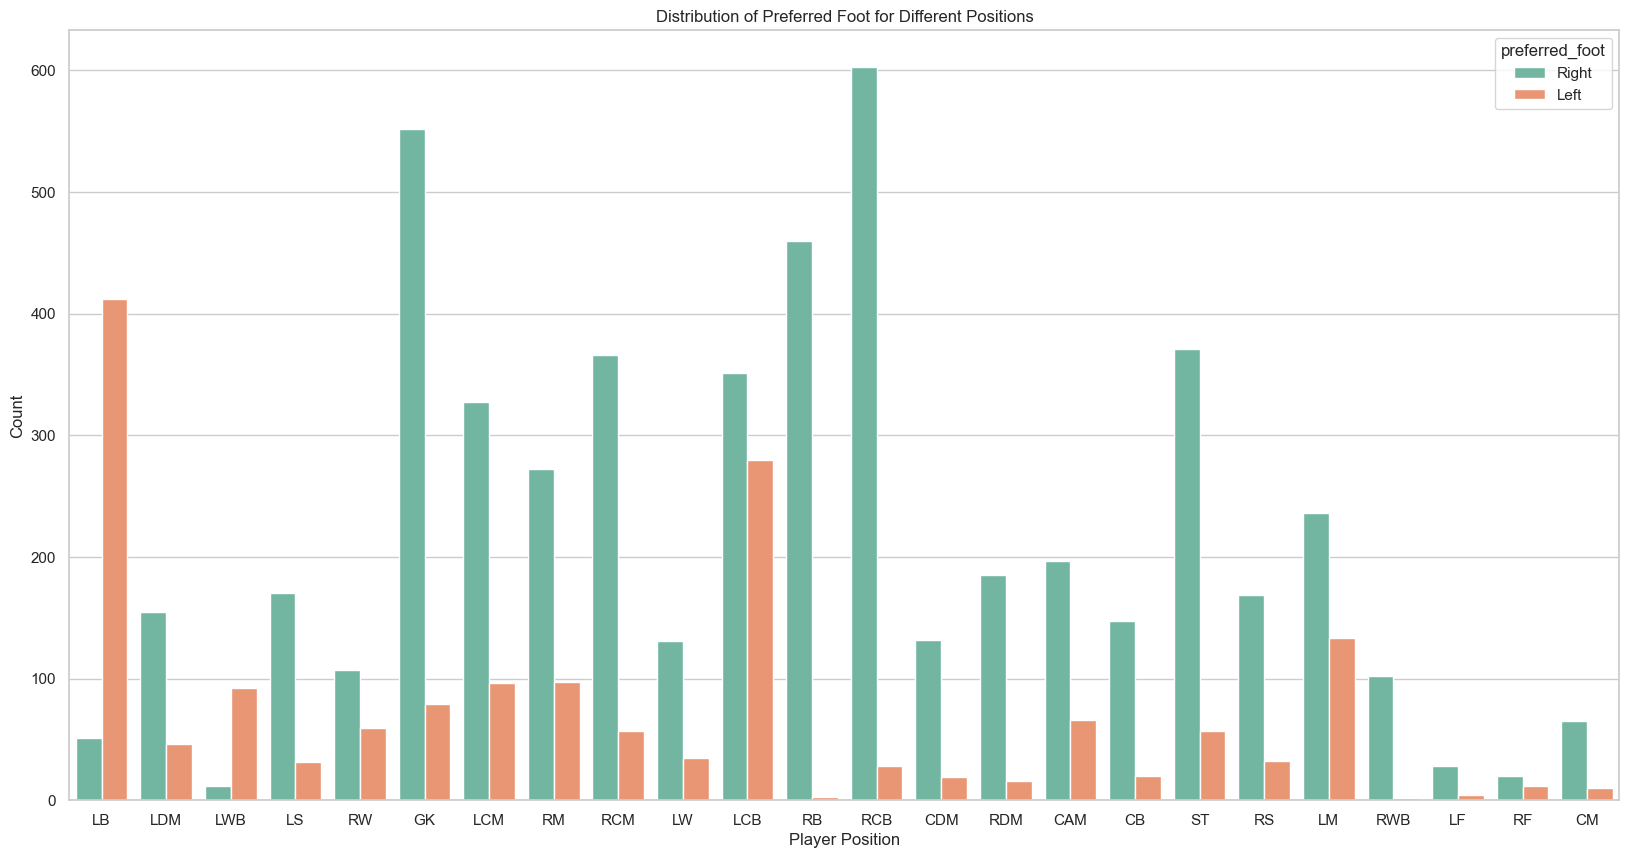

In [405]:
plt.figure(figsize=(20,10))
sns.countplot(x='position', hue ='preferred_foot', data=all_data, palette='Set2')
plt.title('Distribution of Preferred Foot for Different Positions')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.show()

C:\Users\monbi\AppData\Local\Temp\ipykernel_12116\1367675391.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  age_distribution = sns.violinplot(x='position', y='age', data=all_data, order=all_data['position'].value_counts().index, palette='muted')
C:\Users\monbi\AppData\Local\Temp\ipykernel_12116\1367675391.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  age_distribution.set_xticklabels(age_distribution.get_xticklabels(), rotation=45, horizontalalignment='right')


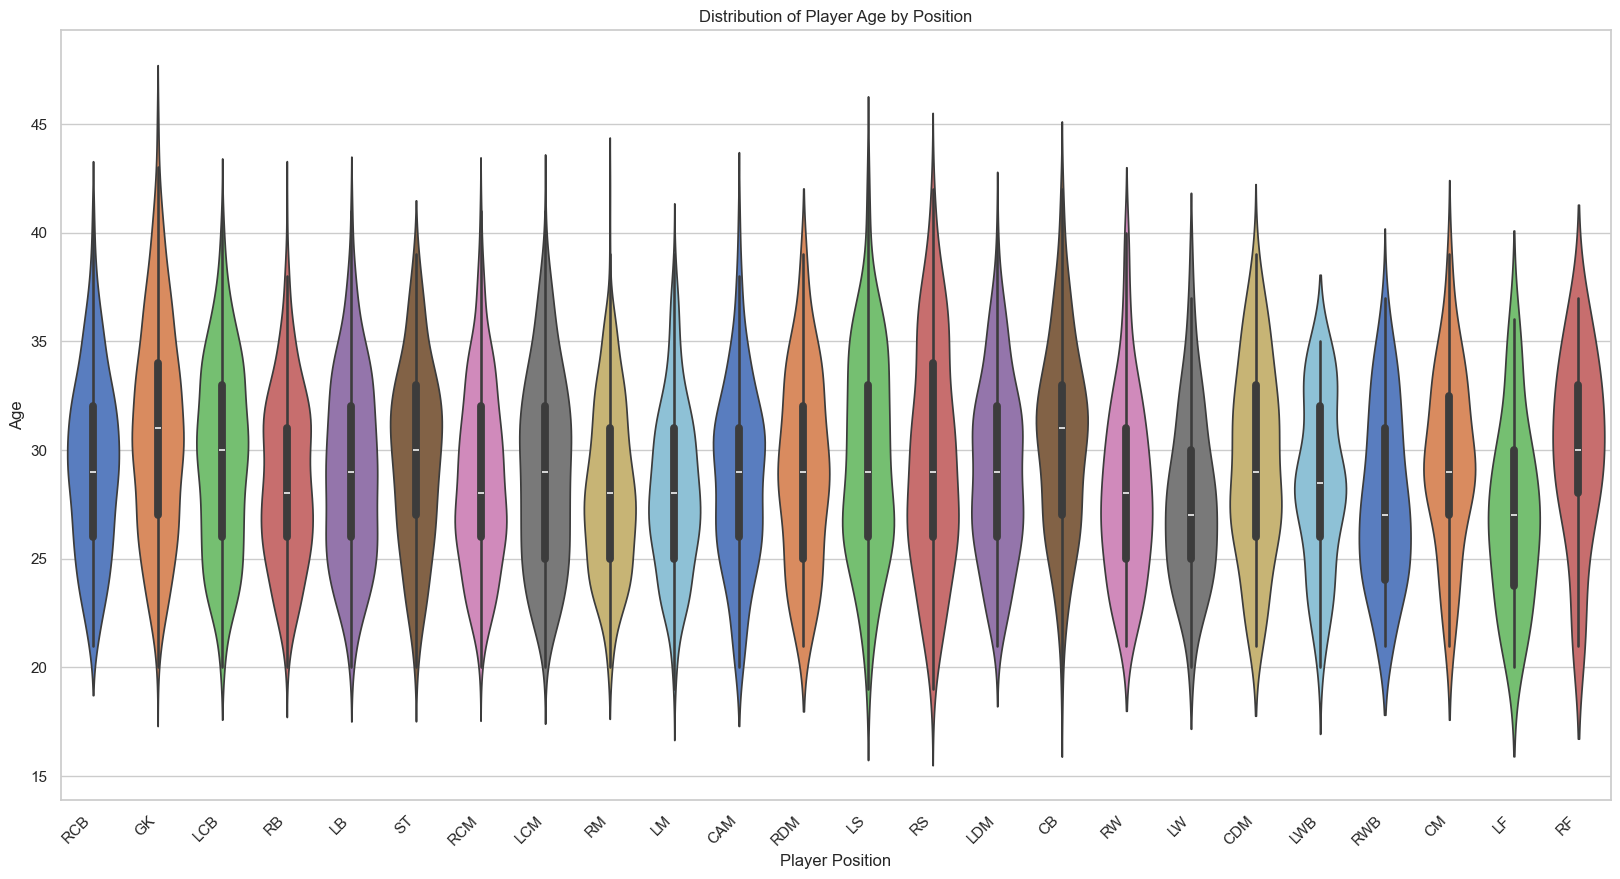

In [406]:
all_data['birthday_date'] = pd.to_datetime(all_data['birthday_date'])
all_data['age'] = np.floor_divide((pd.to_datetime('today') - all_data['birthday_date']).dt.days, 365.25)

plt.figure(figsize=(20,10))
age_distribution = sns.violinplot(x='position', y='age', data=all_data, order=all_data['position'].value_counts().index, palette='muted')

age_distribution.set(xlabel='Player Position', ylabel='Age', title='Distribution of Player Age by Position')

age_distribution.set_xticklabels(age_distribution.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


C:\Users\monbi\AppData\Local\Temp\ipykernel_12116\2827155597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  height_distribution = sns.boxplot(x='position', y='height_cm', data=all_data, order=all_data['position'].value_counts().index, palette='muted')
C:\Users\monbi\AppData\Local\Temp\ipykernel_12116\2827155597.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  weight_distribution = sns.boxplot(x='position', y='weight_kg', data=all_data, order=all_data['position'].value_counts().index, palette='muted')


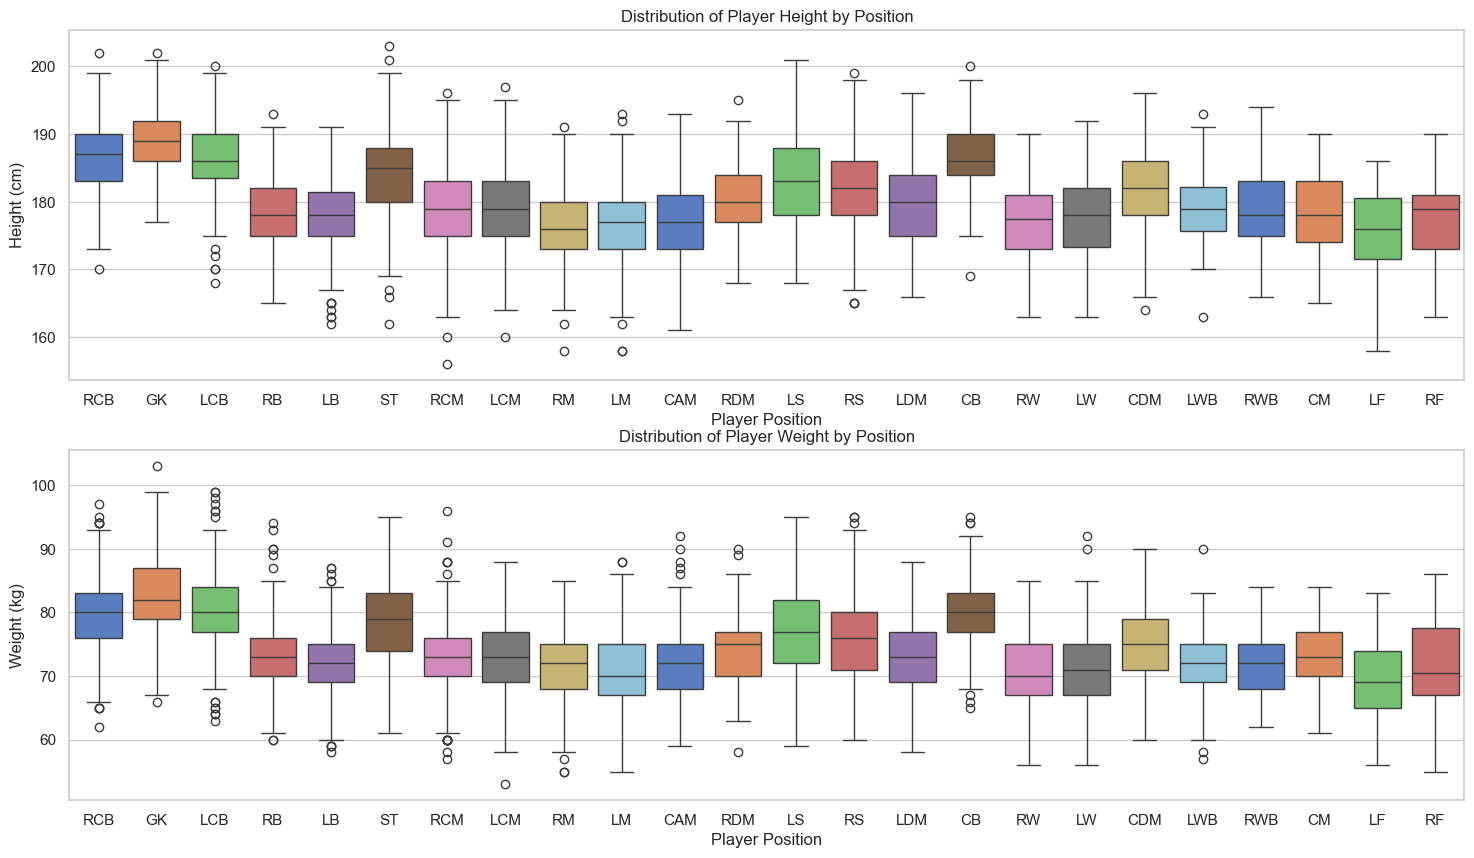

In [407]:
plt.figure(figsize=(18,10))

# height analysis
plt.subplot(2,1,1)
height_distribution = sns.boxplot(x='position', y='height_cm', data=all_data, order=all_data['position'].value_counts().index, palette='muted')
height_distribution.set(xlabel='Player Position', ylabel='Height (cm)', title='Distribution of Player Height by Position')

# weight analysis
plt.subplot(2,1,2)
weight_distribution = sns.boxplot(x='position', y='weight_kg', data=all_data, order=all_data['position'].value_counts().index, palette='muted')
weight_distribution.set(xlabel='Player Position', ylabel='Weight (kg)', title='Distribution of Player Weight by Position')

plt.show()

C:\Users\monbi\AppData\Local\Temp\ipykernel_12116\199670477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='position', y='international_reputation', data=all_data, palette='viridis')


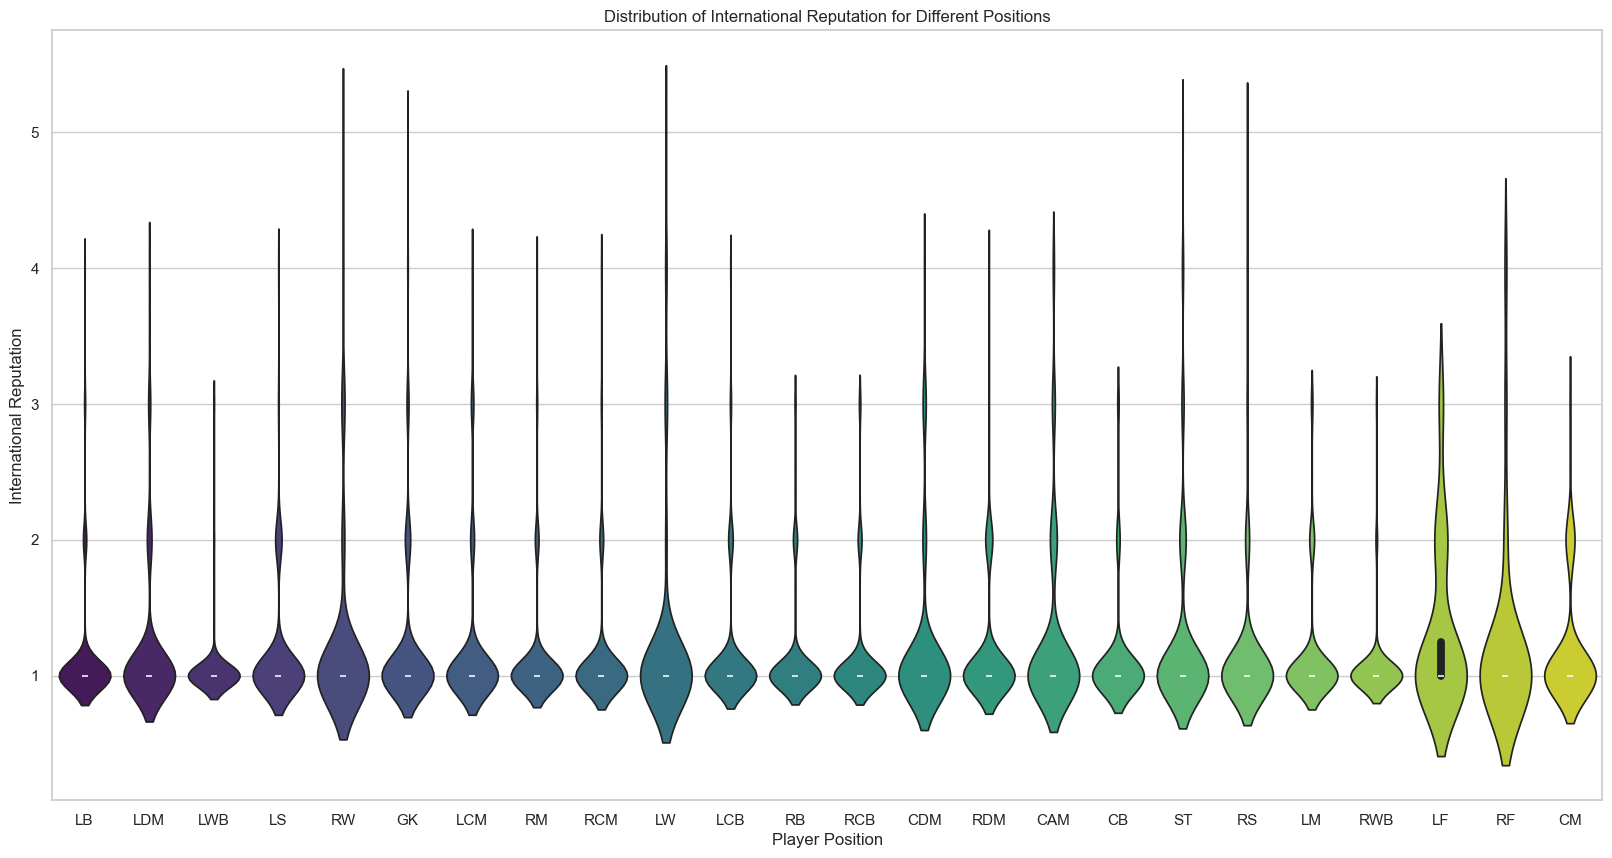

In [408]:
plt.figure(figsize=(20,10))
sns.violinplot(x='position', y='international_reputation', data=all_data, palette='viridis')
plt.title('Distribution of International Reputation for Different Positions')
plt.xlabel('Player Position')
plt.ylabel('International Reputation')
plt.show()

C:\Users\monbi\AppData\Local\Temp\ipykernel_12116\649397507.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['position'] = subset_df['position'].map(position_mapping)


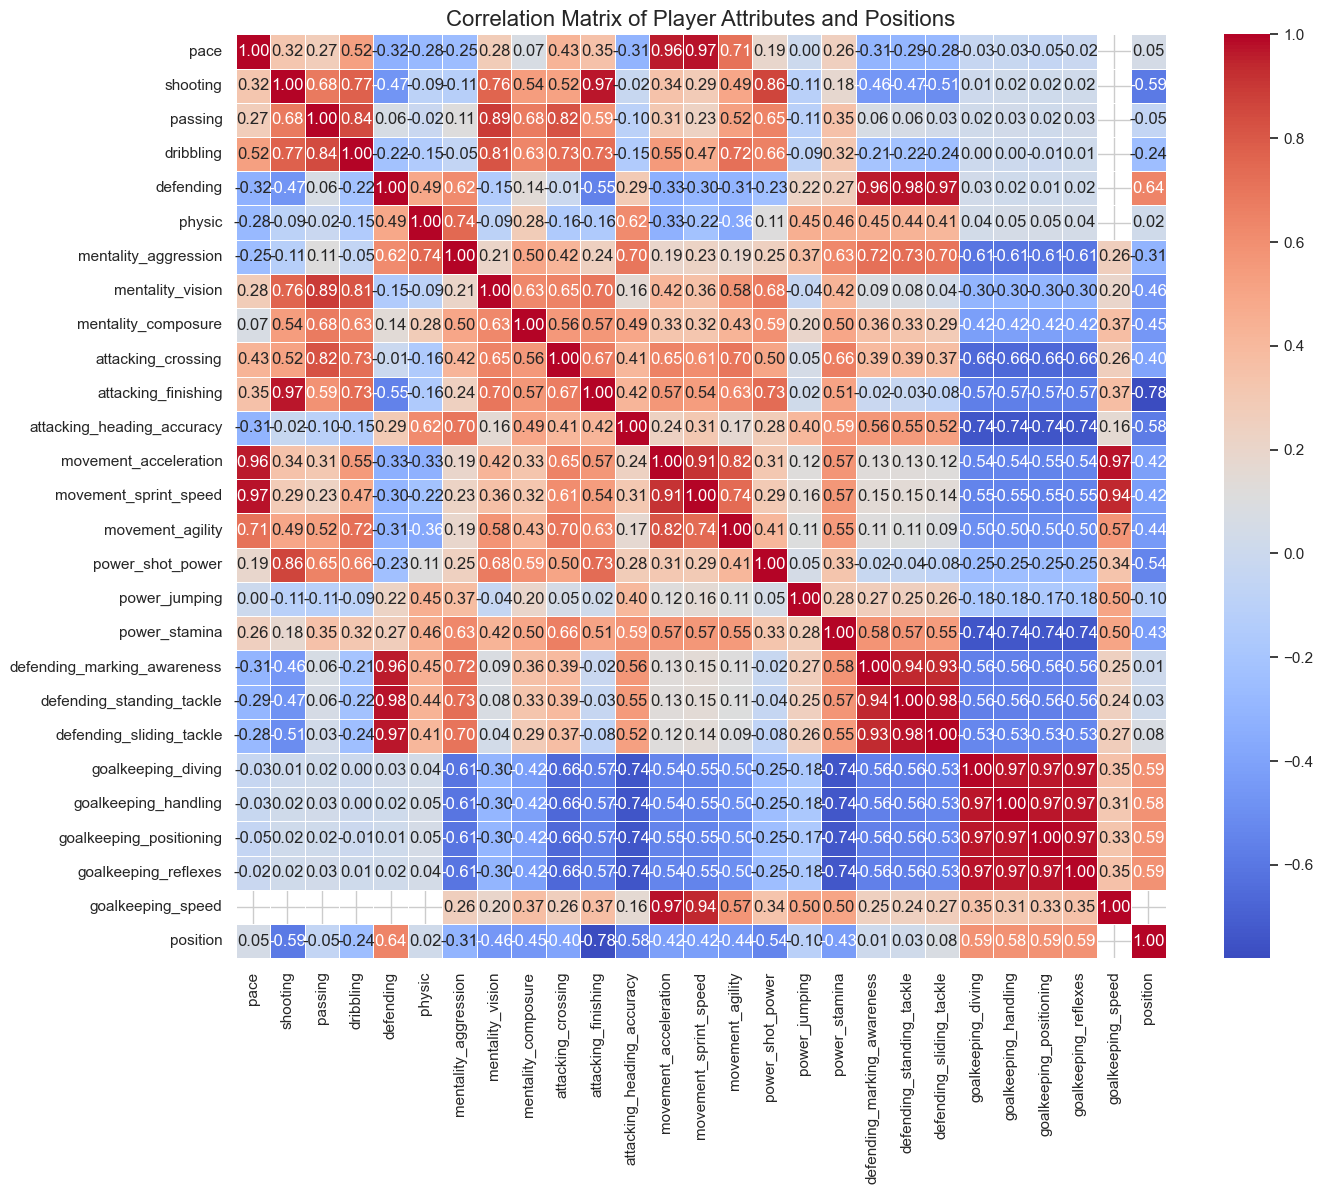

In [409]:
# Select relevant columns for correlation analysis
attributes_for_correlation = [
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'mentality_aggression', 'mentality_vision', 'mentality_composure',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'power_shot_power', 'power_jumping', 'power_stamina',
    'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_positioning',
    'goalkeeping_reflexes', 'goalkeeping_speed'
]

# Add 'position' to the selected columns
attributes_for_correlation.append('position')

# Create a subset of the dataframe with selected columns
subset_df = all_data[attributes_for_correlation]

# Convert categorical position labels into numerical values for correlation analysis
position_mapping = {'ST': 0, 'CF': 1, 'RW': 2, 'LW': 3, 'CAM': 4, 'CM': 5, 'CDM': 6, 'RM': 7, 'LM': 8, 'CB': 9, 'RB': 10, 'LB': 11, 'RWB': 12, 'LWB': 13, 'GK': 14}
subset_df['position'] = subset_df['position'].map(position_mapping)

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Add a legend
heatmap.set_title('Correlation Matrix of Player Attributes and Positions', fontsize=16)
plt.show()

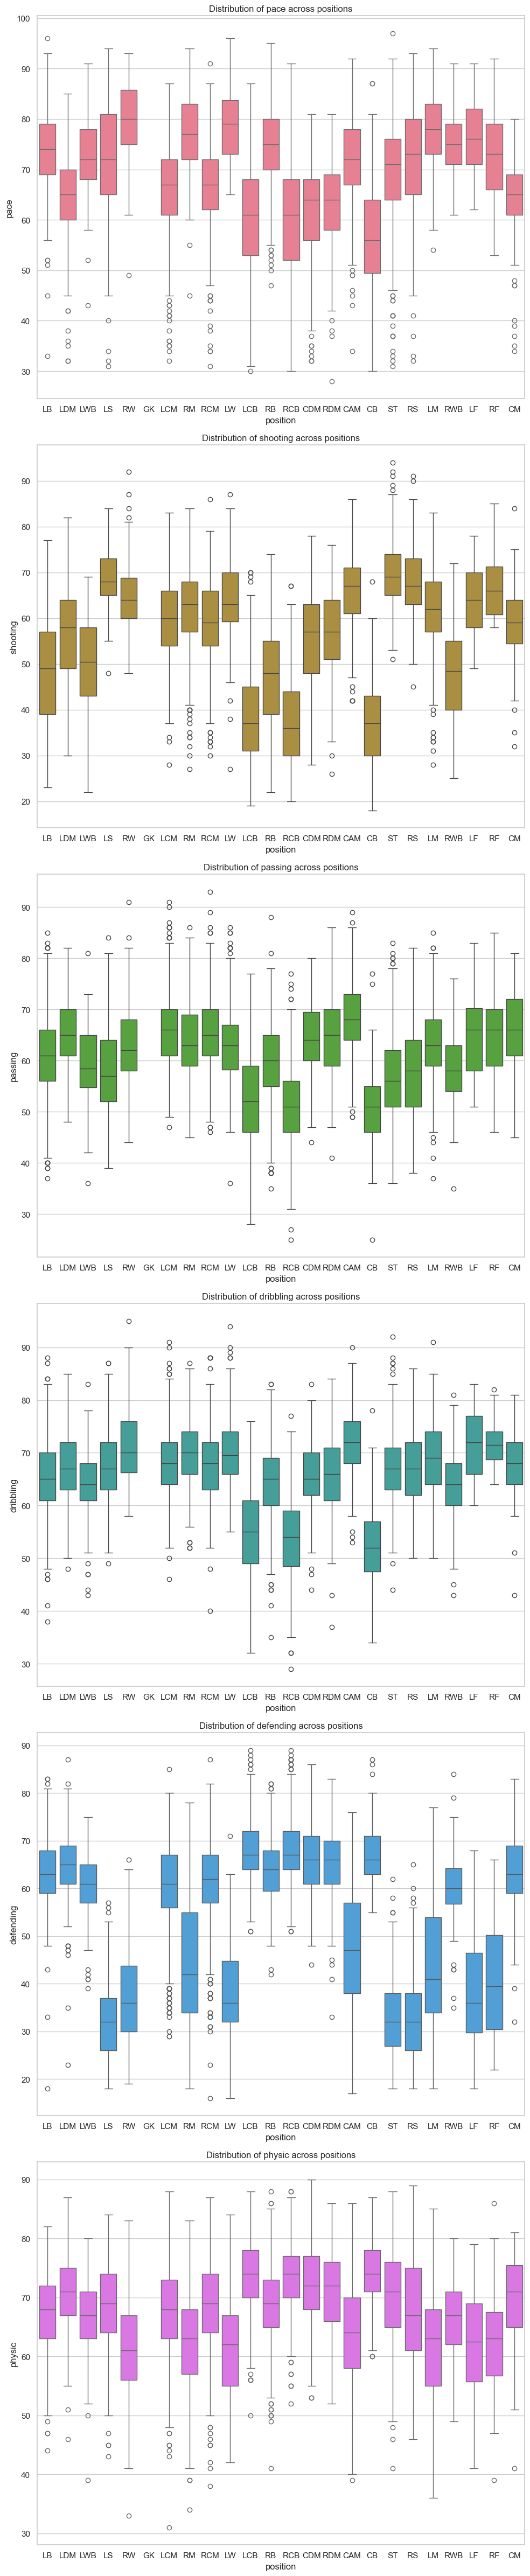

In [422]:
# List of skill attributes
skill_attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']


# Set up subplots
fig, axes = plt.subplots(nrows=len(skill_attributes), ncols=1, figsize=(10, 8 * len(skill_attributes)))

# Generate a list of distinct colors
colors = sns.color_palette("husl", n_colors=len(skill_attributes))

# Plotting loop with distinct colors
for i, (attribute, color) in enumerate(zip(skill_attributes, colors)):
    sns.boxplot(x='position', y=attribute, data=all_data, ax=axes[i], color=color)
    axes[i].set_title(f'Distribution of {attribute} across positions')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#eliminate all with over 80% missing data
missing_percentages = all_data.isnull().sum() / len(all_data) * 100
threshold = 80
columns_to_drop = missing_percentages[missing_percentages >= threshold].index
all_data = all_data.drop(columns_to_drop, axis=1)
all_data.isna().sum()

index                        0
id                           0
overall                      0
potential                    0
value_eur                    5
                          ... 
goalkeeping_positioning      0
goalkeeping_reflexes         0
position                   767
test_train                   0
age                          0
Length: 65, dtype: int64

In [ ]:
# Cleaning player_traits

# Function to convert the string list to a list
def clean_traits(x):
    if isinstance(x, str):
        return x.split(',')
    else:
        return x

# Apply function to column
all_data['player_traits'] = all_data['player_traits'].apply(clean_traits)

# Look at number of unique player traits
traits = [trait for sublist in all_data[~all_data['player_traits'].isna()]['player_traits'] for trait in sublist]

# Count the occurrences of each string
trait_counts = Counter(traits)

# Get the unique strings and their counts
print('The number of unique traits is ' + str(len(trait_counts.keys())))

for key, count in trait_counts.items():
    print(f"{key}: {count}")



The number of unique traits is 48
Early Crosser: 216
Speed Dribbler (AI): 358
Finesse Shot: 272
Solid Player: 359
Cautious With Crosses: 54
Leadership: 371
 Long Passer (AI): 314
 Long Shot Taker (AI): 513
Long Throw-in: 270
 Comes For Crosses: 78
Injury Prone: 452
 Playmaker (AI): 365
 Outside Foot Shot: 317
 Technical Dribbler (AI): 620
 Leadership: 192
 Team Player: 396
 Dives Into Tackles (AI): 124
 Speed Dribbler (AI): 337
 Power Header: 230
Playmaker (AI): 116
Dives Into Tackles (AI): 378
Long Shot Taker (AI): 329
Flair: 416
 Flair: 225
Long Passer (AI): 300
 Giant Throw-in: 24
Power Header: 216
Chip Shot (AI): 13
Power Free-Kick: 126
 Solid Player: 32
Technical Dribbler (AI): 164
Rushes Out Of Goal: 49
 Saves with Feet: 67
Comes For Crosses: 72
 Finesse Shot: 88
Saves with Feet: 23
Outside Foot Shot: 39
Team Player: 121
 Injury Prone: 31
 Early Crosser: 123
 Chip Shot (AI): 65
 Cautious With Crosses: 43
 GK Long Throw: 19
 Rushes Out Of Goal: 38
GK Long Throw: 64
 One Club Playe

In [ ]:
# Commenting out the below based on new trait info above

# Calculate the frequency of each trait
#trait_frequency = all_data['player_traits'].value_counts(normalize=True)

# Map the traits to their frequencies
#all_data['player_traits_encoded'] = all_data['player_traits'].map(trait_frequency)

# Print the result
#print(all_data[['player_traits', 'player_traits_encoded']].head())
#test = all_data[['player_traits', 'player_traits_encoded']]

3. Feature Engineering

In [ ]:
#encoding dates

# Convert 'birthdate' to a datetime object
all_data['club_joined'] = pd.to_datetime(all_data['club_joined'])
all_data['birthday_date'] = pd.to_datetime(all_data['birthday_date'])

# Define the reference date (e.g., the current date)
reference_date = datetime.now()

# Calculate the age by subtracting the birthdate from the reference date
all_data['yearinclub'] = (reference_date - all_data['club_joined']).dt.days // 365
all_data['age'] = (reference_date - all_data['birthday_date']).dt.days // 365

all_data['years_until_contract_expires'] =  all_data.club_contract_valid_until - datetime.today().year

# Print the result
print(all_data[['yearinclub', 'age', 'years_until_contract_expires']].head())


   yearinclub  age  years_until_contract_expires
0         2.0   33                             3
1         2.0   27                            -1
2         2.0   22                             3
3         5.0   31                             0
4         4.0   33                            -1


In [ ]:
def extract_bodytype(bodytype_string):
    return bodytype_string.split()[0]

# Apply the function to the 'bodytype' column
all_data['body_type'] = all_data['body_type'].apply(extract_bodytype)

print(all_data['body_type'].unique())



['Normal' 'Lean' 'Stocky' 'Unique']


In [ ]:
#work_rate
print(all_data['work_rate'].unique())


['Medium/High' 'Medium/Medium' 'High/Medium' 'High/Low' 'High/High'
 'Medium/Low' 'Low/Medium' 'Low/High' 'Low/Low']


In [ ]:
encoder = LabelEncoder()
all_data['body_type_encoded'] = encoder.fit_transform(all_data['body_type'])
all_data['work_rate_encoded'] = encoder.fit_transform(all_data['work_rate'])
all_data['preferred_foot_encoded'] = encoder.fit_transform(all_data['preferred_foot'])
all_data['real_face_encoded'] = encoder.fit_transform(all_data['real_face'])

In [ ]:
# Identify features with missing values
features_with_missing_values = all_data.columns[all_data.isnull().any()].tolist()

# Display the count of missing values for each feature
missing_values_count = all_data[features_with_missing_values].isnull().sum()

# Print the results
print("Features with missing values:")
print(features_with_missing_values)

print("\nCount of missing values for each feature:")
print(missing_values_count)

Features with missing values:
['value_eur', 'club_joined', 'release_clause_eur', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'position', 'yearinclub']

Count of missing values for each feature:
value_eur                5
club_joined            396
release_clause_eur     401
player_traits         2874
pace                   701
shooting               701
passing                701
dribbling              701
defending              701
physic                 701
position               767
yearinclub             396
dtype: int64


In [ ]:
#we use the KNNimputer to imputate the missing values in the numeric variables
def impute(data,columns):
    # Create KNNImputer object with k=8
    imputer = KNNImputer(n_neighbors=8)
    # Perform KNN imputation
    data[columns] = imputer.fit_transform(data[columns])
    return data[columns]

imputer_columns=['value_eur', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'yearinclub']

impute(all_data,imputer_columns)
all_data.isna().sum()

index                           0
id                              0
overall                         0
potential                       0
value_eur                       0
                               ..
years_until_contract_expires    0
body_type_encoded               0
work_rate_encoded               0
preferred_foot_encoded          0
real_face_encoded               0
Length: 71, dtype: int64

In [ ]:
all_data.head()

,index,id,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,league_level,club_jersey_number,club_joined,club_contract_valid_until,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,position,test_train,age,yearinclub,years_until_contract_expires,body_type_encoded,work_rate_encoded,preferred_foot_encoded,real_face_encoded
0,0,216302,71,71,1400000.0,10000,1989-12-28,176,73,1,29,2021-07-12,2026,Right,5,3,1,Medium/High,Normal,No,2400000.0,[Early Crosser],70.0,52.0,60.0,70.0,67.0,66.0,64,40,56,65,41,68,64,58,58,68,71,70,87,61,86,67,77,86,58,66,56,79,53,48,58,66,65,66,65,14,11,12,12,12,LB,1,33,2.0,3,1,6,1,0
1,1,237867,65,71,1000000.0,2000,1996-10-23,183,73,1,4,2021-07-23,2022,Right,3,2,1,Medium/Medium,Lean,No,2000000.0,NaN,65.0,38.0,58.0,60.0,63.0,67.0,50,31,59,64,31,57,36,41,64,65,64,65,57,62,67,49,62,71,66,42,66,66,48,62,46,59,65,61,58,10,13,7,6,11,LDM,1,27,2.0,-1,0,8,1,0
2,2,253472,65,77,1600000.0,2000,2001-09-27,178,69,1,19,2021-07-24,2026,Left,3,3,1,High/Medium,Normal,No,2300000.0,[Speed Dribbler (AI)],79.0,35.0,58.0,66.0,59.0,64.0,59,30,53,60,37,65,56,35,55,64,82,77,71,62,75,50,65,67,61,28,69,62,58,60,31,65,60,58,59,10,10,8,10,11,LWB,1,22,2.0,3,1,2,0,0
3,3,223994,72,72,2300000.0,5000,1992-02-26,188,81,1,9,2018-02-08,2023,Right,3,3,1,High/Medium,Lean,No,2900000.0,[Finesse Shot],64.0,74.0,51.0,68.0,24.0,76.0,32,78,75,59,70,65,48,53,45,74,61,66,64,67,53,71,71,75,87,69,52,18,76,60,75,75,16,22,19,16,15,13,8,9,LS,1,31,5.0,0,0,2,1,0
4,4,251635,65,65,525000.0,3000,1990-06-12,179,74,1,30,2019-07-01,2022,Left,2,2,1,Medium/High,Normal,No,709000.0,[Solid Player],74.0,53.0,59.0,53.0,61.0,69.0,64,38,49,63,46,43,53,58,55,56,71,76,70,60,71,72,80,78,70,67,53,63,60,52,52,58,64,61,58,12,5,11,12,15,LB,1,33,4.0,-1,1,6,0,0


In [ ]:
#work_rate
print(all_data['international_reputation'].unique())

[1 2 3 4 5]


In [ ]:
# Identify numerical columns (excluding the target column)
#nocolumns = [['position', 'id']]
#numerical_columns = all_data.select_dtypes(include=['number']).columns.tolist()
#numerical_columns = [col for col in numerical_columns if col != nocolumns]

# Normalize numerical columns using Min-Max scaling
#scaler = MinMaxScaler()
#all_data[numerical_columns] = scaler.fit_transform(all_data[numerical_columns])

# Print the result
#print(all_data.head())



In [ ]:
#we start by normalizing the numerical data
def normalize_data(data):
    min_value = min(data)
    max_value = max(data)
    normalized_data = []

    for value in data:
        normalized_value = (value - min_value) / (max_value - min_value)
        normalized_data.append(normalized_value)

    return normalized_data

all_data['overall'] = normalize_data(all_data['overall'])
all_data['potential'] = normalize_data(all_data['potential'])
all_data['value_eur'] = normalize_data(all_data['value_eur'])
all_data['wage_eur'] = normalize_data(all_data['wage_eur'])
all_data['height_cm'] = normalize_data(all_data['height_cm'])
all_data['weight_kg'] = normalize_data(all_data['weight_kg'])
all_data['league_level'] = normalize_data(all_data['league_level'])
all_data['club_jersey_number'] = normalize_data(all_data['club_jersey_number'])
all_data['weak_foot'] = normalize_data(all_data['weak_foot'])
all_data['skill_moves'] = normalize_data(all_data['skill_moves'])
all_data['international_reputation'] = normalize_data(all_data['international_reputation'])
all_data['release_clause_eur'] = normalize_data(all_data['release_clause_eur'])
all_data['pace'] = normalize_data(all_data['pace'])
all_data['shooting'] = normalize_data(all_data['shooting'])
all_data['passing'] = normalize_data(all_data['passing'])
all_data['dribbling'] = normalize_data(all_data['dribbling'])
all_data['defending'] = normalize_data(all_data['defending'])
all_data['physic'] = normalize_data(all_data['physic'])
all_data['attacking_crossing'] = normalize_data(all_data['attacking_crossing'])
all_data['attacking_heading_accuracy'] = normalize_data(all_data['attacking_heading_accuracy'])
all_data['preferred_foot_encoded'] = normalize_data(all_data['preferred_foot_encoded'])
all_data['mentality_positioning'] = normalize_data(all_data['mentality_positioning'])
all_data['attacking_finishing'] = normalize_data(all_data['attacking_finishing'])
all_data['defending_sliding_tackle'] = normalize_data(all_data['defending_sliding_tackle'])
all_data['goalkeeping_reflexes'] = normalize_data(all_data['goalkeeping_reflexes'])
all_data['mentality_interceptions'] = normalize_data(all_data['mentality_interceptions'])
all_data['power_strength'] = normalize_data(all_data['power_strength'])

display(all_data)

,index,id,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,league_level,club_jersey_number,club_joined,club_contract_valid_until,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,position,test_train,age,yearinclub,years_until_contract_expires,body_type_encoded,work_rate_encoded,preferred_foot_encoded,real_face_encoded
0,0,216302,0.511111,0.428571,0.007089,0.027182,1989-12-28,0.425532,0.40,0.00,0.285714,2021-07-12,2026,Right,1.00,0.50,0.0,Medium/High,Normal,No,0.006322,[Early Crosser],0.608696,0.447368,0.514706,0.621212,0.680000,0.593220,0.655172,0.408602,0.579545,65,41,68,64,58,58,68,71,70,87,61,86,67,77,86,0.471429,66,56,0.858824,0.542553,48,58,66,65,66,0.686047,14,11,12,12,0.113636,LB,1,33,2.0,3,1,6,1.0,0
1,1,237867,0.377778,0.428571,0.005026,0.004292,1996-10-23,0.574468,0.40,0.00,0.030612,2021-07-23,2022,Right,0.50,0.25,0.0,Medium/Medium,Lean,No,0.005251,NaN,0.536232,0.263158,0.485294,0.469697,0.626667,0.610169,0.494253,0.311828,0.613636,64,31,57,36,41,64,65,64,65,57,62,67,49,62,71,0.585714,42,66,0.705882,0.489362,62,46,59,65,61,0.604651,10,13,7,6,0.102273,LDM,1,27,2.0,-1,0,8,1.0,0
2,2,253472,0.377778,0.571429,0.008120,0.004292,2001-09-27,0.468085,0.32,0.00,0.183673,2021-07-24,2026,Left,0.50,0.50,0.0,High/Medium,Normal,No,0.006054,[Speed Dribbler (AI)],0.739130,0.223684,0.485294,0.560606,0.573333,0.559322,0.597701,0.301075,0.545455,60,37,65,56,35,55,64,82,77,71,62,75,50,65,67,0.514286,28,69,0.658824,0.595745,60,31,65,60,58,0.616279,10,10,8,10,0.102273,LWB,1,22,2.0,3,1,2,0.0,0
3,3,223994,0.533333,0.452381,0.011728,0.012876,1992-02-26,0.680851,0.56,0.00,0.081633,2018-02-08,2023,Right,0.50,0.50,0.0,High/Medium,Lean,No,0.007661,[Finesse Shot],0.521739,0.736842,0.382353,0.590909,0.106667,0.762712,0.287356,0.817204,0.795455,59,70,65,48,53,45,74,61,66,64,67,53,71,71,75,0.885714,69,52,0.141176,0.787234,60,75,75,16,22,0.151163,16,15,13,8,0.079545,LS,1,31,5.0,0,0,2,1.0,0
4,4,251635,0.377778,0.285714,0.002578,0.007153,1990-06-12,0.489362,0.42,0.00,0.295918,2019-07-01,2022,Left,0.25,0.25,0.0,Medium/High,Normal,No,0.001794,[Solid Player],0.666667,0.460526,0.500000,0.363636,0.600000,0.644068,0.655172,0.387097,0.500000,63,46,43,53,58,55,56,71,76,70,60,71,72,80,78,0.642857,67,53,0.670588,0.617021,52,52,58,64,61,0.604651,12,5,11,12,0.147727,LB,1,33,4.0,-1,1,6,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,762,205601,0.533333,0.452381,0.011728,0.047210,1992-01-10,0.191489,0.24,0.00,0.020408,2021-07-17,2025,Left,0.50,0.50,0.0,Medium/Low,Lean,Yes,0.010071,[Speed Dribbler (AI)],0.782609,0.631579,0.632353,0.696970,0.240000,0.152542,0.701149,0.655914,0.477273,70,58,76,70,58,61,72,86,78,86,65,87,72,65,50,0.085714,66,43,0.341176,0.755319,71,70,64,30,33,0.302326,13,12,12,10,0.079545,NaN,0,31,2.0,2,0,7,0.0,1
7658,763,223752,0.444444,0.500000,0.008635,0.004292,1996-04-17,0.510638,0.34,0.00,0.010204,2019-01-01,2022,Right,0.25,0.25,0.0,Low/High,Stocky,No,0.006857,NaN,0.579710,0.342105,0.367647,0.303030

In [ ]:
#we deconcatenate again the test data and train data from the all_data
train_data = all_data.loc[all_data.test_train == 1]
test_data = all_data.loc[all_data.test_train == 0]

In [ ]:
#We check that it deconcatenated properly and we are working with the correct dataframes
train_data.shape,test_data.shape

((6895, 71), (767, 71))

In [ ]:
test_data.head()

,index,id,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,league_level,club_jersey_number,club_joined,club_contract_valid_until,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,position,test_train,age,yearinclub,years_until_contract_expires,body_type_encoded,work_rate_encoded,preferred_foot_encoded,real_face_encoded
6895,0,215562,0.333333,0.238095,0.002320,0.007153,1995-07-07,0.319149,0.28,0.75,0.234694,2019-06-24,2022,Right,1.00,0.25,0.0,High/Medium,Normal,No,0.002121,NaN,0.695652,0.197368,0.441176,0.530303,0.533333,0.525424,0.632184,0.290323,0.511364,57,23,61,62,55,51,59,74,77,84,55,88,45,84,80,0.428571,28,51,0.600000,0.521277,44,36,57,54,59,0.604651,15,12,12,11,0.147727,NaN,0,28,4.0,-1,1,2,1.0,0
6896,1,248311,0.355556,0.261905,0.002449,0.001288,1991-07-14,0.638298,0.62,0.00,0.438776,2020-09-12,2023,Left,0.50,0.25,0.0,Medium/Medium,Normal,No,0.001703,"[Leadership, Power Header]",0.536232,0.263158,0.411765,0.348485,0.613333,0.796610,0.609195,0.279570,0.647727,56,55,53,31,35,57,50,64,66,52,59,45,56,88,74,0.828571,38,66,0.623529,0.436170,48,33,55,63,63,0.674419,9,14,9,11,0.045455,NaN,0,32,3.0,0,1,8,0.0,0
6897,2,223933,0.355556,0.404762,0.004640,0.004292,1997-05-23,0.872340,0.68,0.50,0.285714,2021-01-05,2023,Right,0.25,0.25,0.0,Medium/Medium,Lean,No,0.003912,[Injury Prone],0.710145,0.578947,0.338235,0.454545,0.146667,0.677966,0.321839,0.655914,0.715909,56,61,61,47,38,44,62,73,80,44,59,48,67,50,69,0.771429,56,59,0.164706,0.617021,53,65,55,23,25,0.151163,6,7,8,16,0.136364,NaN,0,26,2.0,0,0,8,1.0,0
6898,3,232546,0.533333,0.452381,0.011728,0.035765,1991-09-19,0.340426,0.22,0.00,0.071429,2019-07-03,2022,Right,0.50,0.50,0.0,High/Medium,Stocky,No,0.009267,NaN,0.637681,0.723684,0.691176,0.636364,0.333333,0.542373,0.781609,0.763441,0.613636,71,66,71,62,64,68,73,75,69,72,64,74,76,66,70,0.714286,76,25,0.282353,0.702128,76,62,63,43,39,0.395349,11,15,8,11,0.136364,NaN,0,32,4.0,-1,2,2,1.0,0
6899,4,189217,0.333333,0.238095,0.002191,0.004292,1991-02-03,0.468085,0.30,0.00,0.071429,2019-01-31,2023,Right,0.75,0.50,0.0,High/Medium,Normal,No,0.002006,"[Injury Prone, Speed Dribbler (AI)]",0.782609,0.552632,0.558824,0.560606,0.520000,0.610169,0.655172,0.623656,0.420455,64,53,65,65,63,62,64,83,81,80,60,74,66,81,74,0.585714,58,57,0.576471,0.627660,62,52,57,56,58,0.569767,9,16,13,16,0.068182,NaN,0,32,4.0,0,1,2,1.0,0


In [ ]:
all_columns = all_data.columns.tolist()
print("All column names:", all_columns)

All column names: ['index', 'id', 'overall', 'potential', 'value_eur', 'wage_eur', 'birthday_date', 'height_cm', 'weight_kg', 'league_level', 'club_jersey_number', 'club_joined', 'club_contract_valid_until', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defe

In [ ]:
from sklearn.model_selection import train_test_split
columns_for_prediction = ['overall', 'potential', 'value_eur', 'wage_eur', 'height_cm', 'weight_kg', 'league_level', 'club_jersey_number', 'weak_foot', 'skill_moves', 'international_reputation', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'yearinclub', 'age', 'years_until_contract_expires', 'body_type_encoded', 'work_rate_encoded', 'preferred_foot_encoded', 'real_face_encoded']
X = train_data[columns_for_prediction] # Features
y = train_data['position']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Train a RandomForestClassifier to get feature importances
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature importances:")
print(feature_importance_df)

# Select the top k features based on importance
k = 20  # You can choose your desired number of top features
selected_features = feature_importance_df.head(k)['Feature'].tolist()

# Print the selected features
print(f"\nTop {k} selected features:")
print(selected_features)

Feature importances:
                         Feature  Importance
20    attacking_heading_accuracy    0.033375
57        preferred_foot_encoded    0.030340
18            attacking_crossing    0.029942
40         mentality_positioning    0.029471
46      defending_sliding_tackle    0.024846
48          goalkeeping_handling    0.024290
19           attacking_finishing    0.023672
44   defending_marking_awareness    0.023494
23               skill_dribbling    0.023098
39       mentality_interceptions    0.022563
45     defending_standing_tackle    0.022535
16                     defending    0.021426
50       goalkeeping_positioning    0.021098
36                power_strength    0.021046
41              mentality_vision    0.020867
22             attacking_volleys    0.020502
37              power_long_shots    0.020022
13                      shooting    0.019276
51          goalkeeping_reflexes    0.019223
12                          pace    0.019156
4                      height_cm  

In [ ]:
best_columns = ['attacking_crossing', 'attacking_heading_accuracy', 'preferred_foot_encoded', 'mentality_positioning', 'attacking_finishing', 'defending_sliding_tackle', 'goalkeeping_reflexes', 'mentality_interceptions', 'defending', 'power_strength']
target = ['position']
X = train_data[selected_features] # Features
y = train_data[target]  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import lightgbm as lgb

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_predictions = gb_model.predict(X_test)
# Evaluate the Gradient Boosting model
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

#Lightgbm estimator
light_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
light_model.fit(X_train, y_train)
light_predictions = light_model.predict(X_test)
# Evaluate the Loghtgbm model
light_accuracy = accuracy_score(y_test, light_predictions)
print("Light Accuracy:", light_accuracy)


c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.444525018129079


c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Accuracy: 0.41116751269035534
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1754
[LightGBM] [Info] Number of data points in the train set: 5516, number of used features: 20
[LightGBM] [Info] Start training from score -3.235511
[LightGBM] [Info] Start training from score -3.779126
[LightGBM] [Info] Start training from score -3.787095
[LightGBM] [Info] Start training from score -4.504534
[LightGBM] [Info] Start training from score -2.398802
[LightGBM] [Info] Start training from score -2.685819
[LightGBM] [Info] Start training from score -2.373185
[LightGBM] [Info] Start training from score -2.771864
[LightGBM] [Info] Start training from score -3.604773
[LightGBM] [Info] Start training from score -5.437354
[LightGBM] [Info] Start training from score -2.911626
[LightGBM] [Info] Start training from score -3.485510
[LightGBM] [Info

c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
#Random Forest and Gradient Boosting,
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut
import lightgbm as lgb



# Step 3: Create the StratifiedKFold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


import time

# Function to evaluate model and measure time
def evaluate_model_with_time(model, X, y, cv):
    start_time = time.time()
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return scores.mean(), elapsed_time

# Initialize the models
logistic_regression = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier()
lightgbm = lgb.LGBMClassifier()

# Create a dictionary to store the results and time spent
results_linear = {}
results_rf = {}
times_linear = {}
times_rf = {}
results_light = {}
times_light = {}

# Method 1: No cross-validation
results_linear['No CV'], times_linear['No CV'] = evaluate_model_with_time(logistic_regression, X, y, cv=None)
results_rf['No CV'], times_rf['No CV'] = evaluate_model_with_time(random_forest, X, y, cv=None)
results_light['No CV'], times_light['No CV'] = evaluate_model_with_time(lightgbm, X, y, cv=None)





c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed w

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1758
[LightGBM] [Info] Number of data points in the train set: 5516, number of used features: 20
[LightGBM] [Info] Start training from score -3.268301
[LightGBM] [Info] Start training from score -3.717568
[LightGBM] [Info] Start training from score -3.819618
[LightGBM] [Info] Start training from score -4.521064
[LightGBM] [Info] Start training from score -2.392832
[LightGBM] [Info] Start training from score -2.701905
[LightGBM] [Info] Start training from score -2.390850
[LightGBM] [Info] Start training from score -2.789408
[LightGBM] [Info] Start training from score -3.534004
[LightGBM] [Info] Start training from score -5.357312
[LightGBM] [Info] Start training from score -2.928433
[LightGBM] [Info] Start training from score -3.534004
[LightGBM] [Info] Start training from score -3.725059
[LightGBM]

c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1732
[LightGBM] [Info] Number of data points in the train set: 5516, number of used features: 20
[LightGBM] [Info] Start training from score -3.268301
[LightGBM] [Info] Start training from score -3.717568
[LightGBM] [Info] Start training from score -3.819618
[LightGBM] [Info] Start training from score -4.521064
[LightGBM] [Info] Start training from score -2.390850
[LightGBM] [Info] Start training from score -2.701905
[LightGBM] [Info] Start training from score -2.390850
[LightGBM] [Info] Start training from score -2.792362
[LightGBM] [Info] Start training from score -3.534004
[LightGBM] [Info] Start training from score -5.396532
[LightGBM] [Info] Start training from score -2.928433
[LightGBM] [Info] Start training from score -3.534004
[LightGBM] [Info] Start training from score -3.732606
[LightGBM]

c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1735
[LightGBM] [Info] Number of data points in the train set: 5516, number of used features: 20
[LightGBM] [Info] Start training from score -3.263550
[LightGBM] [Info] Start training from score -3.725059
[LightGBM] [Info] Start training from score -3.827916
[LightGBM] [Info] Start training from score -4.521064
[LightGBM] [Info] Start training from score -2.390850
[LightGBM] [Info] Start training from score -2.701905
[LightGBM] [Info] Start training from score -2.392832
[LightGBM] [Info] Start training from score -2.792362
[LightGBM] [Info] Start training from score -3.534004
[LightGBM] [Info] Start training from score -5.396532
[LightGBM] [Info] Start training from score -2.925049
[LightGBM] [Info] Start training from score -3.534004
[LightGBM] [Info] Start training from score -3.725059
[LightGBM]

c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1755
[LightGBM] [Info] Number of data points in the train set: 5516, number of used features: 20
[LightGBM] [Info] Start training from score -3.263550
[LightGBM] [Info] Start training from score -3.725059
[LightGBM] [Info] Start training from score -3.819618
[LightGBM] [Info] Start training from score -4.521064
[LightGBM] [Info] Start training from score -2.390850
[LightGBM] [Info] Start training from score -2.699206
[LightGBM] [Info] Start training from score -2.390850
[LightGBM] [Info] Start training from score -2.792362
[LightGBM] [Info] Start training from score -3.540234
[LightGBM] [Info] Start training from score -5.357312
[LightGBM] [Info] Start training from score -2.928433
[LightGBM] [Info] Start training from score -3.540234
[LightGBM] [Info] Start training from score -3.725059
[LightGBM]

c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1737
[LightGBM] [Info] Number of data points in the train set: 5516, number of used features: 20
[LightGBM] [Info] Start training from score -3.268301
[LightGBM] [Info] Start training from score -3.717568
[LightGBM] [Info] Start training from score -3.819618
[LightGBM] [Info] Start training from score -4.521064
[LightGBM] [Info] Start training from score -2.390850
[LightGBM] [Info] Start training from score -2.699206
[LightGBM] [Info] Start training from score -2.390850
[LightGBM] [Info] Start training from score -2.789408
[LightGBM] [Info] Start training from score -3.534004
[LightGBM] [Info] Start training from score -5.357312
[LightGBM] [Info] Start training from score -2.928433
[LightGBM] [Info] Start training from score -3.534004


In [ ]:
# Method 2: k-fold cross-validation (e.g., k=5)
kf = KFold(n_splits=5)
results_linear['K-fold'], times_linear['K-fold'] = evaluate_model_with_time(logistic_regression, X, y, cv=kf)
results_rf['K-fold'], times_rf['K-fold'] = evaluate_model_with_time(random_forest, X, y, cv=kf)
results_light['K-fold'], times_light['K-fold'] = evaluate_model_with_time(lightgbm, X, y, cv=kf)

# Method 3: Stratified k-fold cross-validation (e.g., k=5)
skf = StratifiedKFold(n_splits=5)
results_linear['Stratified'], times_linear['Stratified'] = evaluate_model_with_time(logistic_regression, X, y, cv=skf)
results_rf['Stratified'], times_rf['Stratified'] = evaluate_model_with_time(random_forest, X, y, cv=skf)
results_light['Stratified'], times_light['Stratified'] = evaluate_model_with_time(lightgbm, X, y, cv=skf)


c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\monbi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed w

KeyboardInterrupt: 

In [ ]:
# Convert the results and times to DataFrames for easier comparison
results_ln = pd.DataFrame(results_linear, index=['Linear Regression'])
results_rf = pd.DataFrame(results_rf, index=['Random Forest'])
times_ln = pd.DataFrame(times_linear, index=['Linear Regression'])
times_rf = pd.DataFrame(times_rf, index=['Random Forest'])
results_light = pd.DataFrame(results_light, index=['light'])
times_light = pd.DataFrame(times_light, index=['light'])

# Display the accuracy and time results
print("Accuracy Results:")
display(pd.concat([results_ln, results_rf, results_light]))
print("\nTime Spent:")
display(pd.concat([times_ln, times_rf, times_light]))

Accuracy Results:


,No CV,K-fold,Stratified
Linear Regression,0.448296,0.451197,0.448296
Random Forest,0.444670,0.442059,0.439884
light,0.423495,0.421320,0.423495



Time Spent:


,No CV,K-fold,Stratified
Linear Regression,24.244320,19.733094,21.533289
Random Forest,9.303403,13.450514,10.818178
light,6.292443,6.200792,8.600261


In [ ]:
features_test = test_data[selected_features]

In [ ]:
kaggle_predictions_rf = rf_model.predict(features_test)


In [ ]:
# Produce .csv for kaggle testing
test_predictions_submit = pd.DataFrame({"id": test_data["id"], "position":kaggle_predictions_rf  })
test_predictions_submit.to_csv("test_predictions_submit.csv", index = False)